There are many ways of showing differences in groups of data. Here I will give four simple examples and give my reasons why barchart with whiskers scores the last.

Lets make some simple set of data

In [16]:
import numpy as np, matplotlib.pyplot as plt

data=np.random.rand(10,3)*10

print(data)
type(data)

[[3.31549497 6.4675458  6.11919936]
 [8.85982265 2.53607634 0.67795972]
 [3.47829308 6.57873392 4.05253421]
 [3.6699726  1.60936584 7.28151026]
 [7.04575582 1.65369706 7.41646997]
 [7.05656134 5.41157745 2.60671214]
 [1.0165486  3.78695385 6.69577949]
 [7.26137835 5.69168926 3.22751678]
 [2.66383012 5.71735883 8.74916471]
 [3.64612793 4.64426885 6.50778873]]


numpy.ndarray

Let's call the boxplot for visualisation. Note this variable is numpy array type

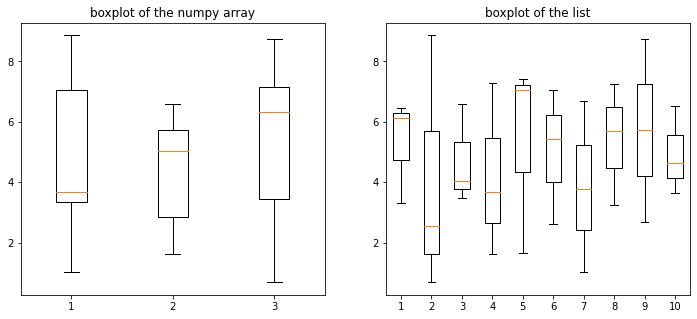

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("boxplot of the numpy array")
_=plt.boxplot(data) #I dump the matplotlib.lines by this
#and now as list
plt.subplot(122)
plt.title("boxplot of the list")
_=plt.boxplot(list(data))

This is a bit weird behaviour, which I noticed not long ago. You can use it for calling boxplot either for columns or for rows (either using np.array or list). Regarding the plot, it shows the mean, max and min, also 25% and 75% levels (quartiles). We have good idea how data are distributed.

The second easy illustration is violin plot

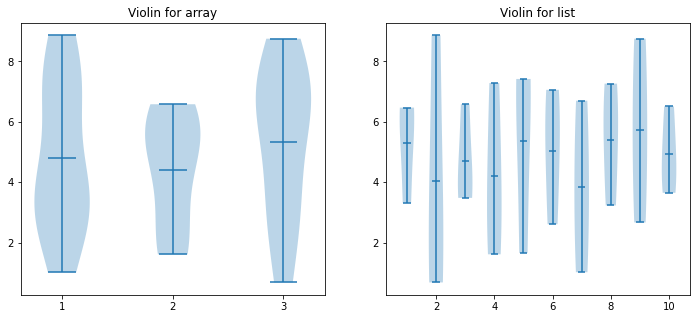

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title("Violin for array")
plt.violinplot(data, showmeans=True);#, showmedians=True, if you want medians
plt.xticks([1,2,3])
plt.subplot(122)
plt.title("Violin for list")
plt.violinplot(list(data), showmeans=True);#, showmedians=True, if you want medians

The violinplot does not show the quartiles, but it shows the shape of the distribution, the mean and the min and max. We hane good understanding of data structure.

Now lets do the famous barchart with whiskers. Yes, it is very popular in cell and medical biology. Sometimes is is the only type of the illustration in the entire manuscript. But wait, we are not ready for it.
To draw the barchart we have to calculate averages for each subset of data.
To draw whiskers we have to calculate stdev

In [19]:
averages, devs=[],[]
for sub in data.T:
    averages.append(np.mean(sub))
    devs.append(np.std(sub))
print(averages)
print(devs)

[4.801378546184518, 4.40972672165572, 5.333463537272388]
[2.410659367730939, 1.8079653897790366, 2.4256508841471502]


Now we are ready to plot

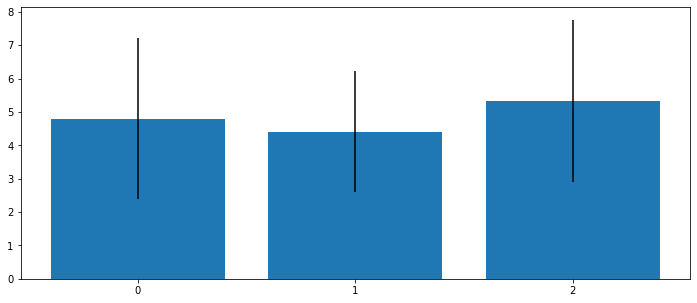

In [41]:
plt.figure(figsize=(12,5))
plt.bar(range(len(averages)), averages, yerr=devs)
plt.xticks([0,1,2]);

The major problem here is not the random data set, rather the fact that we miss all the parameters of the data distribution. The top of the bar stays for the average, and the whisters are standard deviation. However we have no idea how data are scattered within every subset. We don't know whether data are fairly homogeneous or there are outliers, are they symmetrical around mean or not. No clue. All together this makes thos particular plot highly dubious.
At last, we can show the data as the are. This is a so-called jitter or swarm plot.
For this plot we have to add some x-jitter to the data, otherwise they will stay all in one vertical line, which will obscure many dots.

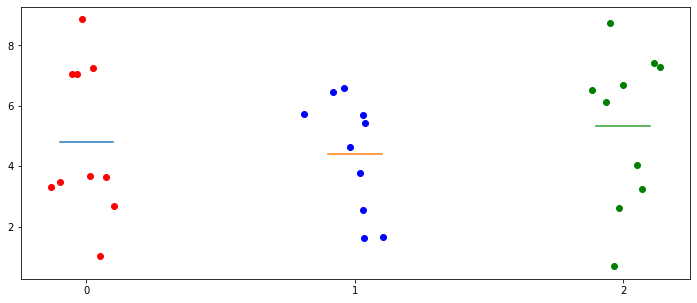

In [47]:
plt.figure(figsize=(12,5))
xval=np.random.randn(3,10)/15
colors=["red","blue","green"]
series=list(data.T)
for i in range(3):
    plt.scatter(i+xval[i],series[i], color=colors[i])
    plt.plot([i-0.1,i+0.1], [np.mean(series[i]),np.mean(series[i])])
plt.xticks([0,1,2]);

Here we have good visual perception at the data, even though quartiles or densities are not calculated.
Next time you think of using barchart with whiskers, think of alternatives too.